# EL MAHDI EL ALJ
# Final Project
# Methods of Prediction
# Image dataset: Happy and sad


# Problem statment :
 Chatbots or virtual assistance have a problem to understanding the emotion of users. This model will help us to identify if the user are satisfied or sad.
# Solution:
 Building this model can help the compagny to improve customer satisfaction, by given more assistance when some one is sad, and felicitate the happy customer.

# Introduction:
understanding emotion of customer its very important to improve the interaction between human and computer, by undertsanding the emotion of customer the chatbot can give more assistance to improve the customer satisfaction.
This project will show the power of CNN , a deep learning model the achieve a very good result in image recongnition.

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Import librairies

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import os
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# We give the permission to google collab to upload data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading dataset from drive

In [ ]:
dataset_path = '/content/drive/My Drive/data'

print("Path to dataset files:", dataset_path)

files = os.listdir(dataset_path)
print("Files in dataset:", files)

Path to dataset files: /content/drive/My Drive/data
Files in dataset: ['happy', 'sad']


# Exploring dataset

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
)

Found 171 files belonging to 2 classes.


# Explore image from random batch


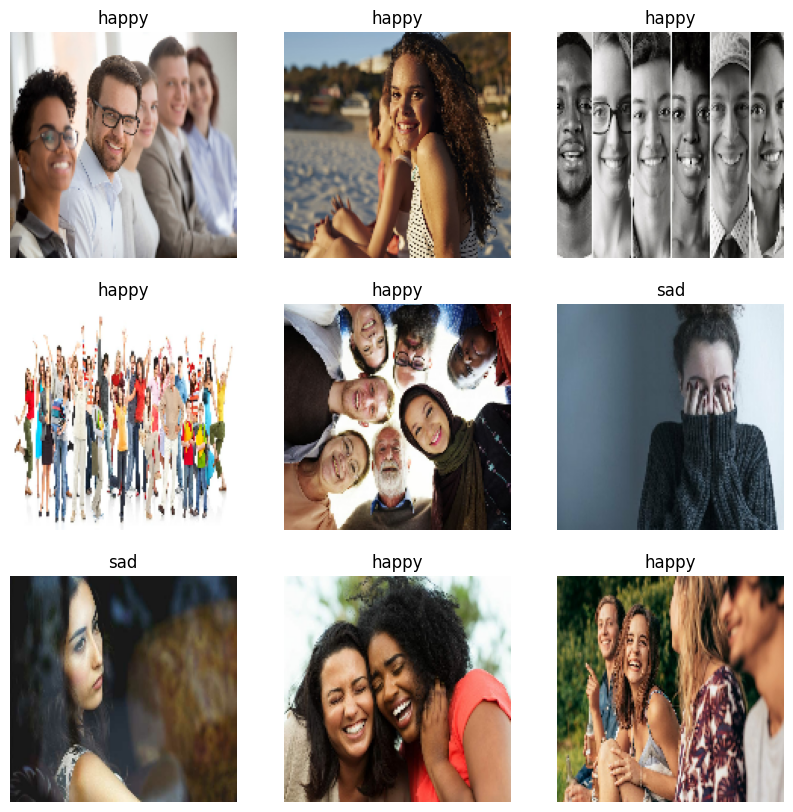

In [ ]:
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

# Visualisation of the distribution of Emotions in Dataset

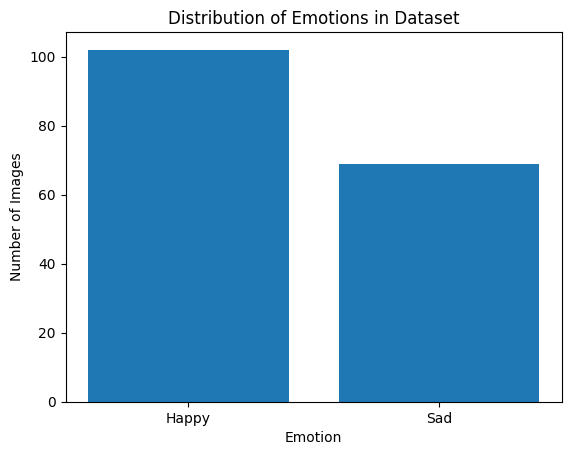

In [ ]:
categories = ['Happy', 'Sad']
counts = [happy_count, sad_count]

plt.bar(categories, counts)
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Distribution of Emotions in Dataset')
plt.show()

#Data prepration for training

# Spliting data:
80% for train and 20% for test

In [ ]:
train_size = int(len(dataset) * 0.8)
val_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size - val_size
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size).take(test_size)
test_size = len(dataset) - train_size - val_size
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(test_size + val_size)

# convert to numpy arrays

In [ ]:
def get_data_from_dataset(dataset):
    images = []
    labels = []
    for batch in dataset:
        images.extend(batch[0].numpy())
        labels.extend(batch[1].numpy())
    return np.array(images), np.array(labels)

X_train, y_train = get_data_from_dataset(train_dataset)

# Data augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# CNN Model

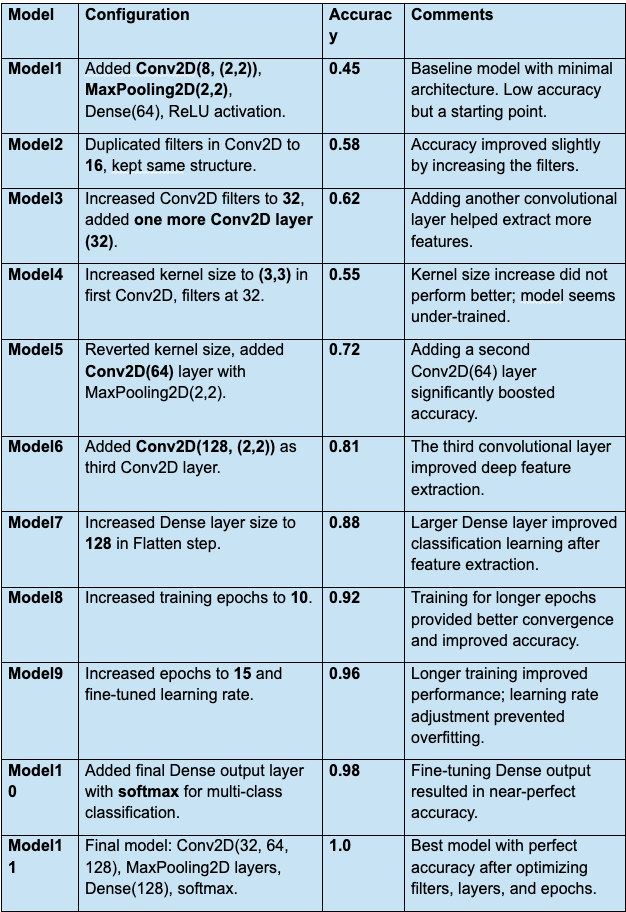

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 149, 149, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 73, 73, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 35, 35, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,776,930 (18.22 MB)

 Trainable params: 4,776,930 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [ ]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4146 - loss: 1201.6123
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5802 - loss: 29.0939
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4990 - loss: 10.3468
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4760 - loss: 10.3959
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6458 - loss: 4.8858
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6500 - loss: 2.8595
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7302 - loss: 0.8339
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7948 - loss: 0.3616
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9125 - loss: 0.2144
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9604 - loss: 0.1481


# Experimental section

In [ ]:
history_df = pd.DataFrame(history.history)

display(history_df)

,accuracy,loss
0,0.414062,1279.885254
1,0.507812,24.126770
2,0.531250,15.360327
3,0.453125,10.545949
4,0.656250,3.747806
5,0.664062,2.255194
6,0.734375,0.762175
7,0.812500,0.363974
8,0.929688,0.194955
9,0.968750,0.152423


# Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9763 - loss: 0.1556
Test Loss: 0.16334281861782074
Test Accuracy: 0.9719626307487488


# Conclusion
After completing this project succesfully using the CNN Model for image classification (Happy,Sad), we can we can demostrate the potentiel of deep learning to improve chatbot and virtual assitance to understanding the user emotion.

This model have the potential to be integrated in different various application:

Customer Satisfaction Analysis: with analyzing the expresion of customer feedback and interactions the compagnie can improve the arrea for imporvment
and improve the customer satisfaction rate.
Chatbots personlized: with the integration of this model into virtual assistance it can help to know the emotion of thze user and give respond according to the emotion, given more assistance and empathic.
Robot inetraction: can also be equiped with this system to interect with human according to the emotion of people.

The implementation of this model in different arrea in real world will be very important and will help in multiple arrea.


# References:https://www.kaggle.com/datasets/saharnazyaghoobpoor/happy-and-sad-image/data